In [1]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils                         

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

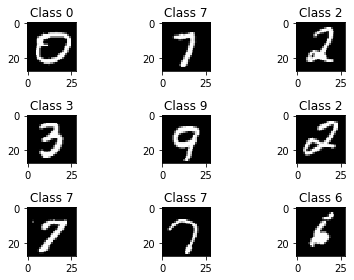

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [5]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
from scipy.ndimage import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [7]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1,0), (1,0), (0,1), (0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train = np.array(X_train_augmented)
y_train = np.array(y_train_augmented)

In [8]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]

In [9]:
no_classes = 10

Y_train = np_utils.to_categorical(y_train, no_classes)
Y_test = np_utils.to_categorical(y_test, no_classes)

## Building a 3-layer Neural Network

![alt text](https://chsasank.github.io/assets/images/crash_course/mnist_net.png)


In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(784,))) 
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

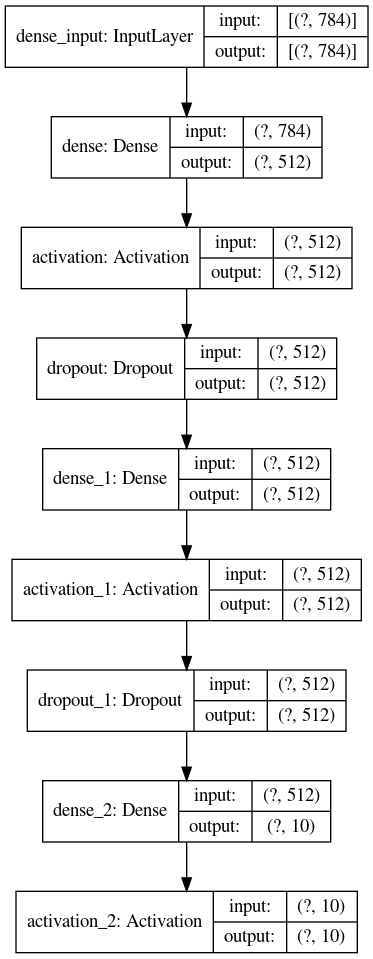

In [12]:
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 14s 6ms/step - loss: 0.1426 - accuracy: 0.9563
Epoch 2/10
2344/2344 [==============================] - 14s 6ms/step - loss: 0.0606 - accuracy: 0.9809
Epoch 3/10
2344/2344 [==============================] - 14s 6ms/step - loss: 0.0456 - accuracy: 0.9852
Epoch 4/10
2344/2344 [==============================] - 14s 6ms/step - loss: 0.0382 - accuracy: 0.9878
Epoch 5/10
2344/2344 [==============================] - 14s 6ms/step - loss: 0.0320 - accuracy: 0.9896
Epoch 6/10
2344/2344 [==============================] - 14s 6ms/step - loss: 0.0293 - accuracy: 0.9906
Epoch 7/10
2344/2344 [==============================] - 14s 6ms/step - loss: 0.0272 - accuracy: 0.9912
Epoch 8/10
2344/2344 [==============================] - 14s 6ms/step - loss: 0.0249 - accuracy: 0.9921
Epoch 9/10
2344/2344 [==============================] - 14s 6ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 10/10
2344/2344 [==============================] - 14s 6ms/step - l

In [15]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9891
Test accuracy: 0.9890999794006348


Plot the accuracy and loss metrics of the model.

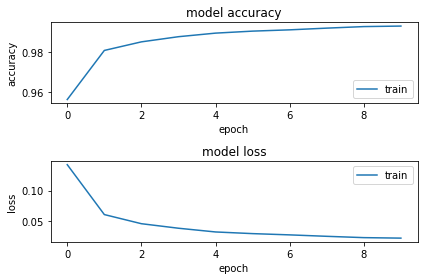

In [16]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [17]:
results = model.predict(test_data)

In [18]:
from PIL import Image

In [19]:
import numpy as np
import tensorflow as tf
from PIL import Image
import os

def load_and_preprocess_image(image_path):
    """
    Loads an image, converts it to grayscale, resizes while preserving aspect ratio,
    normalizes, inverts if necessary, binarizes using median threshold, and flattens it.
    """
    img = Image.open(image_path).convert('L') 
    
    original_width, original_height = img.size
    max_dim = max(original_width, original_height)
    if max_dim == 0:
        return np.zeros((1, 784))
    
    scale_factor = 28 / max_dim
    new_width = int(original_width * scale_factor)
    new_height = int(original_height * scale_factor)
    
    img_resized = img.resize((new_width, new_height), Image.LANCZOS)

    
    img_28 = Image.new('L', (28, 28), 0)
    x_center = (28 - new_width) // 2
    y_center = (28 - new_height) // 2
    img_28.paste(img_resized, (x_center, y_center))
    
    img_array = np.array(img_28, dtype=np.float32) / 255.0
    
    region_mean = np.mean(img_array[y_center:y_center+new_height, x_center:x_center+new_width])
    if region_mean > 0.5:
        img_array = 1.0 - img_array
    
    median_value = np.median(img_array)
    img_array = (img_array > median_value).astype(np.float32)
    
    img_array = img_array.flatten().reshape(1, 784)
    
    return img_array



image1 = load_and_preprocess_image("/kaggle/input/test-images/2.jpeg")
image2 = load_and_preprocess_image("/kaggle/input/test-images/3.jpeg")
image3 = load_and_preprocess_image("/kaggle/input/test-images/5.jpeg")
image4 = load_and_preprocess_image("/kaggle/input/test-images/7.jpeg")
image5 = load_and_preprocess_image("/kaggle/input/test-images/8.jpeg")
image6 = load_and_preprocess_image("/kaggle/input/test-images/9.jpeg")


pred1 = model.predict(image1)
pred2 = model.predict(image2)
pred3 = model.predict(image3)
pred4 = model.predict(image4)
pred5 = model.predict(image5)
pred6 = model.predict(image6)

predicted_class1 = np.argmax(pred1, axis=1)[0]
predicted_class2 = np.argmax(pred2, axis=1)[0]
predicted_class3 = np.argmax(pred3, axis=1)[0]
predicted_class4 = np.argmax(pred4, axis=1)[0]
predicted_class5 = np.argmax(pred5, axis=1)[0]
predicted_class6 = np.argmax(pred6, axis=1)[0]

print(f"Prediction for image1: {predicted_class1}")
print(f"Prediction for image2: {predicted_class2}")
print(f"Prediction for image1: {predicted_class3}")
print(f"Prediction for image2: {predicted_class4}")
print(f"Prediction for image1: {predicted_class5}")
print(f"Prediction for image2: {predicted_class6}")

Prediction for image1: 2
Prediction for image2: 2
Prediction for image1: 5
Prediction for image2: 3
Prediction for image1: 2
Prediction for image2: 7


In [20]:
# 1. Save model
# model.save('mnist_model', save_format='tf')

# 2. Convert using Python API (alternative to command line)
# import tensorflowjs as tfjs
# tfjs.converters.convert_tf_saved_model(
#     'mnist_model',
#     'model_tfjs2'
# )

In [21]:
# import shutil
# import os

# # 1. Create ZIP archive of the model directory
# shutil.make_archive('mnist_model', 'zip', 'mnist_model')